# Electricity Usage Analysis in the State of California

### Background of Study

In the year 2000 and early 2001, California experienced an electricity crisis where there was acute shortage of electricity supply. This led to large scale blackouts in most parts of the state which affected the state's economy greatly, leading to a declaration of a state of emergency by then Governor of California, Gray Davis.(Summer 2002)

The objective of this analysis is to identify how well California has recovered since the electricity crisis, and understand its contribution towards clean energy usage in its electric power industry

### Procedure

    1. Analyze the trend in total electricity usage
    2. Analyze electricity usage across sectors, utility type 
    3. Analyze electricity usage across counties in California
    4. Compare electricity usage with electricity generation in California
    5. Analyze the clean energy outlook in California's electric power industry 

#### Data Source: 
    

    1. California Energy Commission https://www.energy.ca.gov 
    2. United States Census Bureau https://www.census.gov/en.html
    3. California State Association of Counties https://www.counties.org

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
from plotly.subplots import make_subplots
py.sign_in('eserichard', 'TgllhSOe3mrFKrkjZe18')

import warnings
warnings.filterwarnings('ignore')

# !Important: Installation of geopandas is required for plotly to make choropleth plot for states
# For Windows users, install packages in anaconda prompt with these commands: install conda install -c plotly plotly-geo 
# conda install geopandas
# For Unix/Linux based users, !pip install geopandas

In [2]:
# import datasets

# import electricity usage by utility from 2001 to 2018
electricity_by_utility = pd.read_csv("ElectricityByUtility.csv", header=0, index_col=2)

# import electricity usage by county from 2001 to 2018
electricity_by_county = pd.read_csv("ElectricityByCounty.csv", header=0, index_col=0)

# import electricity usage by generation from 2001 to 2018
electricity_gen = pd.read_excel("electricity_gen_2001-current.xlsx", header=1, index_col=0)

# import population of California by County
pop_california = pd.read_excel("population_by_county_2001_2018.xlsx", header=0)

# import fips code for California to use with geopandas package and plotly
fips_code = pd.read_excel("ca_geocodes.xlsx", header=0)

# import total electricity generation data for California
electricity_gen = pd.read_excel("total_electricity_gen.xlsx", header=0, index_col=0)

# import instate electricity generation data for California
instate_electricity_gen = pd.read_excel("instate_electricity_gen.xlsx", header=0, index_col=0)


In [3]:
# Helper functions

# function to generate specified charts for given dataframe
def plot_chart(data, kind, ylabel, xlabel, title):
    data.plot(kind=kind, figsize=(13,7),  legend=False, fontsize=10)
    plt.ylabel(xlabel, fontsize = 10)
    plt.xlabel(ylabel, fontsize = 10)
    plt.title(title)
    plt.show()

# function to generate pie chart comparison of given the dataframe usage by sector for three different years
def PiePlot(df, year1, year2, year3, title):
    labels = df.index.tolist()
    period = [year1, year2, year3]
    
    fig = make_subplots(1, 3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
                        subplot_titles=period)
    for i in range(len(period)):
        fig.add_trace(go.Pie(labels=labels, 
                             values=df[period[i]], 
                             scalegroup='one',
                             name=period[i]), 1, i + 1)
    fig.update_layout(title_text=title)
    fig.show()

# function to flip columns 180 degrees from left to right
def flip_columns_df(df):
    col = df.columns.tolist()
    reverse_col = col[::-1]
    return df[reverse_col]

### 1.0 Total Electricity Usage by year

In [4]:
# create dataframe with Total Usage column
total_elect_by_year = electricity_by_utility.loc[:, ["Total Usage"]]

In [5]:
# group by year and reset index
total_elect_by_year = total_elect_by_year.groupby("Year").sum().reset_index()

In [6]:
# plot line graph showing total electricity consumption by year in California
fig = px.line(total_elect_by_year, x='Year', y='Total Usage', hover_data=['Total Usage'], height=500, 
              labels={'Total Usage': 'Total Usage (GWh)'},title='Total Electricity Usage in California (2001 - 2018)')
fig.show()

In [7]:
# create new column and calculate annual percent change in total usage
total_elect_by_year_percent = total_elect_by_year[:]
total_elect_by_year_percent['Percent Change'] = total_elect_by_year_percent['Total Usage'].pct_change() * 100

# drop the Total Usage column
total_elect_by_year_percent.drop(['Total Usage'], axis=1, inplace=True)

In [8]:
# visualize the annual percentage change in Total Usage in a chart
fig = px.area(total_elect_by_year_percent, x='Year', y='Percent Change',
             hover_data=['Percent Change'], 
             height=500, 
             labels={'Percent Change': '% Change in Total Usage'},
             title='Year-on-Year Percentage Change in Total Electricity Usage in California (2001 - 2018)')

fig.show()

##### 1.1 Observation

The plots shows electricity usage increases with +/-4% flunctuations in total electricity usage from one year to another.

### 2. Electricity Usage across sectors and utility types

#### 2.1 What Sector had the Most Usage of Electricity

In [9]:
# Select electricity usage data with utility sector from main dataframe 
sector_elect = electricity_by_utility.iloc[:, 2:9]

# group electricity usage by year
sector_elect_by_year = sector_elect.groupby('Year').sum()
sector_elect_by_year.head(2)

Ag & Water Pump  Commercial Building  Commercial Other      Industry  \
Year                                                                         
2001     19184.857092         91316.915305      13058.125773  44437.006813   
2002     21088.267921         93233.447904      13211.561558  44776.835070   

      Mining & Construction   Residential  Streetlight  
Year                                                    
2001            5790.799185  73855.858196  1516.709946  
2002            5707.156645  75727.257326  1485.713016

Text(0.5, 0, 'Time Period (Years)')

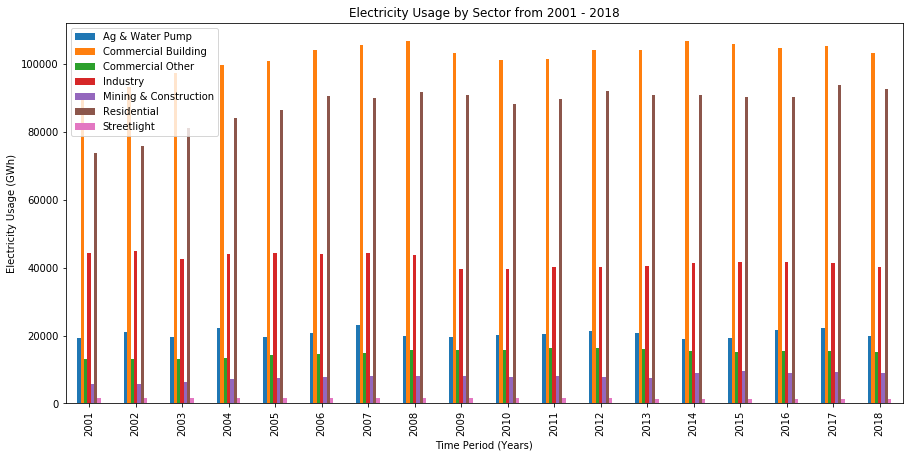

In [10]:
# plot the electricity usage by sector in a grouped bar chart
sector = sector_elect_by_year.plot(kind='bar', legend='best', figsize=(15,7), title='Electricity Usage by Sector from 2001 - 2018')
sector.set_ylabel("Electricity Usage (GWh)")
sector.set_xlabel("Time Period (Years)")

Text(0.5, 0, 'Time Period (Years)')

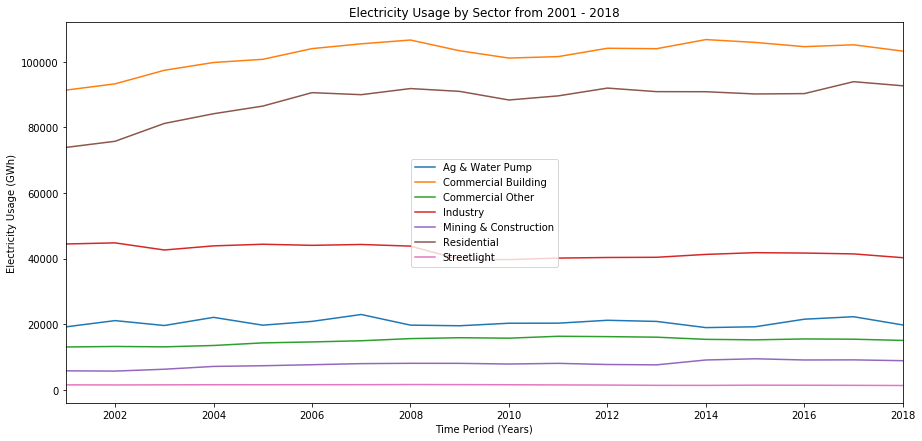

In [11]:
sector = sector_elect_by_year.plot(kind='line', legend='best', figsize=(15,7), title='Electricity Usage by Sector from 2001 - 2018')

sector.set_ylabel("Electricity Usage (GWh)")
sector.set_xlabel("Time Period (Years)")

In [12]:
# sort electricity usage by sector in ascending order
total_elect_by_sector = sector_elect_by_year.sum(axis=0).sort_values(ascending=True)

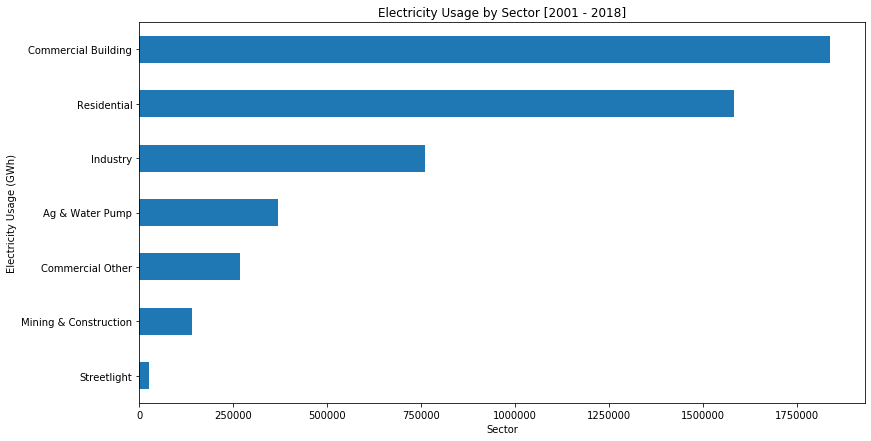

In [13]:
# plot horizontal bar chart to show sector with most electricity usage
plot_chart(total_elect_by_sector, 'barh', 'Sector', 'Electricity Usage (GWh)', 'Electricity Usage by Sector [2001 - 2018]')

In [14]:
# transpose the dataframe
sector_elect_by_year_transpose = sector_elect_by_year.transpose()

In [15]:
# Compare Electricity Usage by Sector for different time in years using a pie chart
PiePlot(sector_elect_by_year_transpose, 2001, 2010, 2018, 'Comparison of Electricity Usage by Sector at Different Times in Years')

In [16]:
# Compare Electricity Usage by Sector for different time in years using a pie chart
PiePlot(sector_elect_by_year_transpose,2003, 2007, 2015, 'Comparison of Electricity Usage by Sector at Different Times in Years')

#### 2.2 Total Electricity Usage by Utility Company Type

In [17]:
# select Total Usage, Utility Type  and Year columns
utility_electricity = electricity_by_utility.iloc[:, [0,1,9]]
utility_type_electricity = utility_electricity.iloc[:, [0,2]]

In [18]:
# reset index
utility_type_electricity = utility_type_electricity.reset_index()

# group the data utility type and year;
utility_type_electricity_pivot = utility_type_electricity.groupby(['Utility Type', 'Year']).sum().reset_index()

In [19]:
# create a pivot table with Utility Type as columns and Year as index
utility_type_electricity_pivot = utility_type_electricity_pivot.pivot(index='Year', columns='Utility Type', values='Total Usage')

In [20]:
# Sum the Electricity Usage across the Utility Types and sort in ascending order
total_elect_by_utility = utility_type_electricity_pivot.sum(axis=0).sort_values(ascending=True)

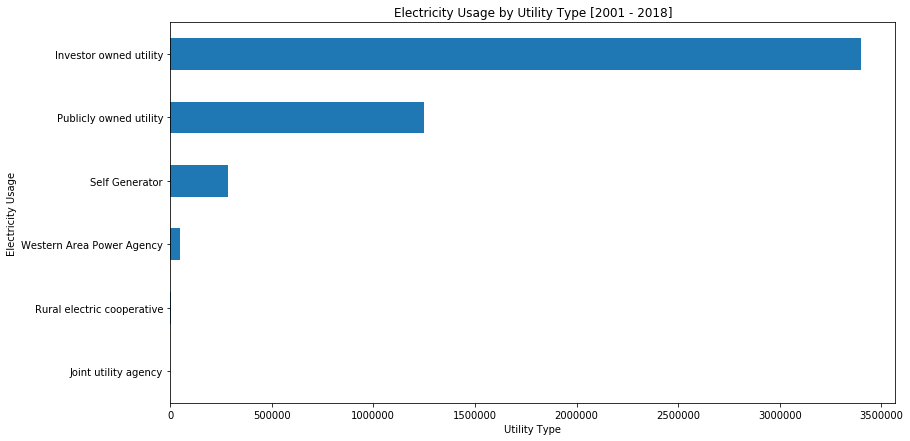

In [21]:
# plot chart for Electricity Usage by Utility Type
plot_chart(total_elect_by_utility, 'barh', 'Utility Type', 'Electricity Usage', 'Electricity Usage by Utility Type [2001 - 2018]')

In [22]:
# transpose dataframe 
utility_type_electricity_transpose = utility_type_electricity_pivot.transpose()

In [23]:
# Compare Electricity Usage by Sector for different time in years using a pie chart
PiePlot(utility_type_electricity_transpose, 2001, 2010, 2018, "Comparison of Electricity Usage by Utility Type at Different Times in Years")

##### 2.3 Observation

Commercial Buildings uses electricity the most while Streetlights consumes the least

From the Pie Charts, we observed the relative usage by composition for different sectors remained fairly the same over the specified time period

Investor Owned Utilities supply the most electricity used while the joint utility agency contributes the least 

From the Pie Charts, we observed an increase in electrcity usage for self generated utility type in absolute and proportions within the specified time period

### 3.0 Electricity Usage Across Counties in California

#### 3.1 What County has the Most Electricity Usage

In [24]:
# Select dataframe from electricity usage by county and drop the sector column
elect_by_county = electricity_by_county.drop(['Sector'], axis=1)

# group by county and sum to obtain electricity usage by each county
elect_by_county = elect_by_county.groupby('County').sum()

In [25]:
# Select the Total Usage columntotal_elect_by_county_sorted.reset_index() and sort in an ascending order
total_elect_by_county = elect_by_county.loc[:,['Total Usage']]
total_elect_by_county_sorted = total_elect_by_county.sort_values(by='Total Usage', ascending=True)

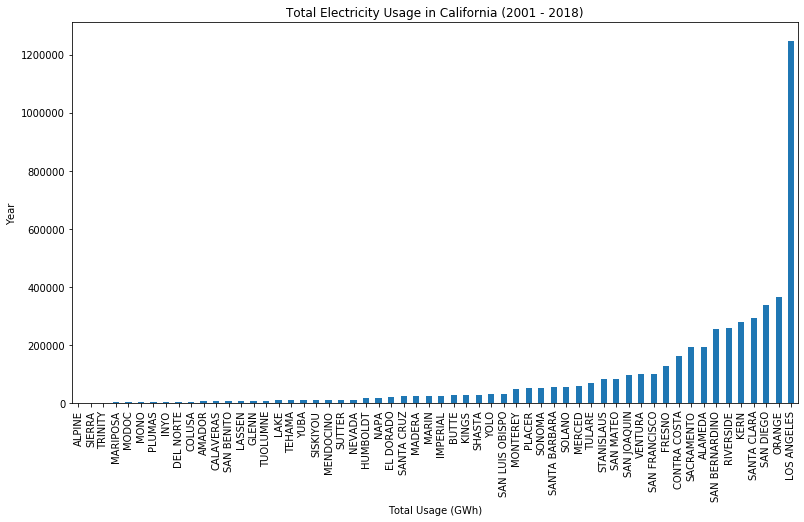

In [26]:
plot_chart(total_elect_by_county_sorted, 'bar','Total Usage (GWh)', 'Year', 'Total Electricity Usage in California (2001 - 2018)' )

In [27]:
# create new dataframe and unstack by grouped sector column
electricity_by_county_unstack = electricity_by_county.reset_index()

#select Country, Sector and Total Usage Columns
electricity_by_county_unstack = electricity_by_county_unstack.loc[:,['County', 'Sector', 'Total Usage']] 
electricity_by_county_unstack = electricity_by_county_unstack.set_index(['County','Sector'])

# unstack by grouped sector usage
electricity_by_county_unstack = electricity_by_county_unstack.unstack('Sector')         

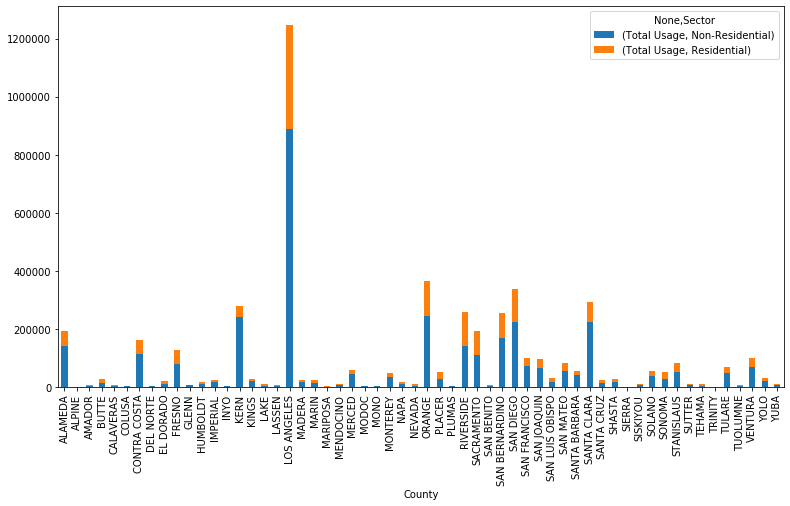

In [28]:
# plot bar chart to show residential and non-residential usage
electricity_by_county_unstack.plot(kind='bar', figsize=(13,7), stacked=True, )

#### 3.2 What County has the Most Electricity Usage per capita

In [29]:
# create pivot table for population data
pop_california_pivot = pop_california.pivot(index='County', columns='Year', values='Population')

In [30]:
# Data cleaning steps to prepare electricity_by_county data for electricity usage per capita analysis

# Drop Total Usage column
reversed_elect_by_county = elect_by_county.drop(['Total Usage'], axis=1)

In [31]:
# apply function to re-order columns from the order 2018-2001 to 2001-2018  to match order in population dataset
reversed_elect_by_county = flip_columns_df(reversed_elect_by_county)
reversed_elect_by_county = reversed_elect_by_county.reset_index()

# Rename elements in County column to first case capital letters and set index to County
reversed_elect_by_county['County'] = [x.title() for x in reversed_elect_by_county['County']]
reversed_elect_by_county.set_index('County', inplace=True)

# change data type of columns to corresponding data type in population dataset
reversed_elect_by_county.columns = reversed_elect_by_county.columns.astype('int64')

In [32]:
# Divide electricity usage by population to compute electricity usage per capita
elect_per_capita_by_county = reversed_elect_by_county.div(pop_california_pivot) 

# divide by 1e+03 to convert from Giga Watt Hour(GWh) to Mega Watt Hour (MWh)
elect_per_capita_by_county = elect_per_capita_by_county * 1e+03

In [33]:
# Calculate average electricity usage per capita over time period
elect_per_capita_by_county['Average Usage Per Capita'] = elect_per_capita_by_county.sum(axis=1) / len(elect_per_capita_by_county.columns)

In [34]:
# Plot the average electricity usage per capita by county on a choropleth
import plotly.figure_factory as ff

scope = ['CA']

values = elect_per_capita_by_county['Average Usage Per Capita'].tolist()
fips = fips_code['FIPS Code'].tolist()

colorscale = ["#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#bc80bd", "#ccebc5", "#ffed6f",
              "#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#bc80bd", "#ccebc5", "#ffed6f",
              "#8dd3c7", "#ffffb3", "#bebada", "#fb8072", "#ffffb3", "#bebada", "#fb8072",
              "#80b1d3", "#fdb462", "#b3de69", "#fccde5", "#fdb462", "#b3de69", "#fccde5",
              "#d9d9d9", "#bc80bd", "#ccebc5", "#ffed6f", "#bc80bd", "#ccebc5", "#ffed6f",
              "#d9d989", "#bc807d", "#cceb55", "#ffed4f", "#bc807d", "#cceb55", "#ffed4f"]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=scope,
    colorscale=colorscale, round_legend_values=True,
    simplify_county=0, simplify_state=0,
    county_outline={'color': 'rgb(15, 15, 55)', 'width': 0.5},
    show_hover=True,
    state_outline={'width': 1},
    legend_title='Average Electricity Use per capita',
    title='Average Electricity Use per capita in California [2001 - 2018]')

fig.layout.template = None
fig.show()

In [35]:
# Top 5 Counties with Average Electricity Usage per capita
topfive_avg = elect_per_capita_by_county['Average Usage Per Capita'].sort_values(ascending=False).reset_index().head()
topfive_avg.index = topfive_avg.index + 1 #to start at number 1 instead of 0
topfive_avg

County  Average Usage Per Capita
1    Kern                 19.263012
2   Modoc                 16.476258
3  Alpine                 13.793146
4    Mono                 13.502647
5   Glenn                 13.056533

In [36]:
# Bottom 5 Counties with Average Electricity Usage per capita
bottomfive_avg = elect_per_capita_by_county['Average Usage Per Capita'].sort_values(ascending=True).reset_index().head()
bottomfive_avg.index = bottomfive_avg.index + 1 #to start at number 1 instead of 0
bottomfive_avg

County  Average Usage Per Capita
1  Santa Cruz                  5.028344
2       Marin                  5.527548
3     Trinity                  5.686128
4      Sonoma                  5.973511
5  San Benito                  5.984118

##### 3.3 Observation

Los Angeles has consumes electricity the most while Alpine consumes the least electricity

On a per capita basis, the counties: Kern, Modoc, Alpine, Mono and Glenn has the most average electricity usage from 2001 - 2018, while Santa Cruz consumes the least

### 4.0 Compare Electricity Usage with Electricity Generated

#### 4.1 Total Electricity Generation

In [37]:
# create new dataframe and add Grand Total column from the electricity generation dataset
total_electricity_gen = electricity_gen.loc[["Grand Total"]].transpose().reset_index()
# Add remaining columns in a separate dataframe
electricity_gen_by_type = electricity_gen.iloc[:-1, :].transpose()

# create new dataframe and add Grand Total column from the instate electricity generation dataset
total_instate_electricity_gen = instate_electricity_gen.loc[["Grand Total"]].transpose()

# Add remaining columns in a separate dataframe
instate_electricity_gen_by_type = instate_electricity_gen.iloc[:-1, :].transpose()

In [38]:
# rename column appropriately to Year
total_electricity_gen.rename(columns={'index':'Year'}, inplace=True)

In [39]:
fig = px.line(total_electricity_gen, x='Year', y='Grand Total', hover_data=['Grand Total'], height=500, 
              labels={'Grand Total': 'Grand Total (GWh)'},title='Total Electricity Generated in California (2001 - 2018)')
fig.show()

In [40]:
total_electricity_gen.set_index('Year', inplace=True)

In [41]:
total_electricity_gen.columns.name =""
total_elect_by_year = total_elect_by_year.set_index('Year')


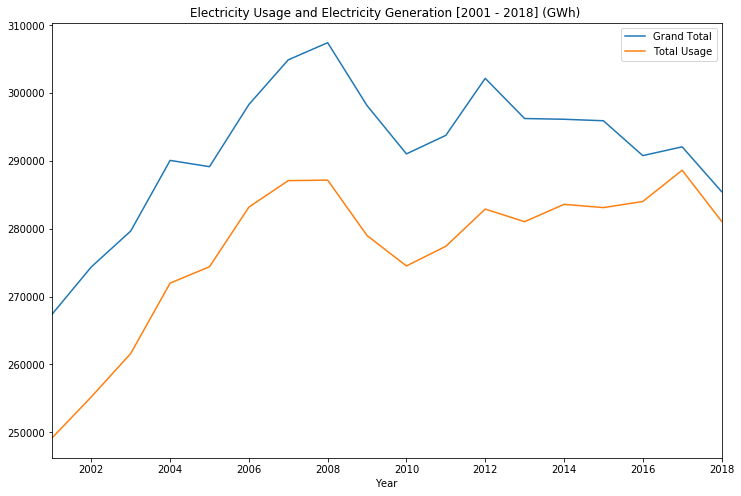

In [42]:
# Plot Total Electricity Usage and Total Electricity Generation in a Line Graph
ax = total_electricity_gen.plot(figsize=(12,8), title="Electricity Usage and Electricity Generation [2001 - 2018] (GWh) ")
total_elect_by_year.plot(ax=ax)

In [43]:
# Set index name
total_instate_electricity_gen.index.name='Year'

In [44]:
# merge total electricity generated data with total instate electricity generation
combined_electricity_data = total_electricity_gen.merge(total_instate_electricity_gen, on='Year')

In [45]:
# rename columns appropriately
combined_electricity_data.columns.name = ""
combined_electricity_data.rename(columns = {'Grand Total_x':'Total Gen', 'Grand Total_y':'Total Instate Gen'}, inplace=True)

In [46]:
# calculate total electricity generation from imports 
combined_electricity_data['Total Import'] = combined_electricity_data['Total Gen'] - combined_electricity_data['Total Instate Gen']

In [47]:
# calculate percentage of total electricity generation from imports 
combined_electricity_data['Percent Import'] = combined_electricity_data['Total Import'] / combined_electricity_data['Total Gen'] * 100

In [48]:
# transpose dataframe
combined_electricity_data_transpose = combined_electricity_data.transpose()

In [49]:
# Calculate the average values for total electricity generation, total instate electricity generation, 
# total imported electricity generation and percentage import from 2001 to 2018
combined_electricity_data_transpose['Average Value'] = combined_electricity_data_transpose.sum(axis=1)/len(combined_electricity_data_transpose.columns)

In [50]:
combined_electricity_data_transpose[['Average Value']]

Year               Average Value
                                
Total Gen          291845.111111
Total Instate Gen  201922.444444
Total Import        89922.666667
Percent Import         30.777693

##### 4.2 Observation

 Electricity generation has been on the a downturn since 2012 in the state of California
 
 However, electricity generation remains higher compared to its overall usage. 
 
 Approximately 31% of the electricity is generated from imported resource type obtained from neighbouring states annually

### 5.0 Clean Energy Outlook

In [51]:
electricity_gen_by_type['Coal'] = electricity_gen_by_type['In-State Coal'] + electricity_gen_by_type['Direct Coal Imports']
electricity_gen_by_type.drop(['Other', 'In-State Coal', 'Direct Coal Imports'], axis=1, inplace=True)

Text(0.5, 0, 'Time Period (Years)')

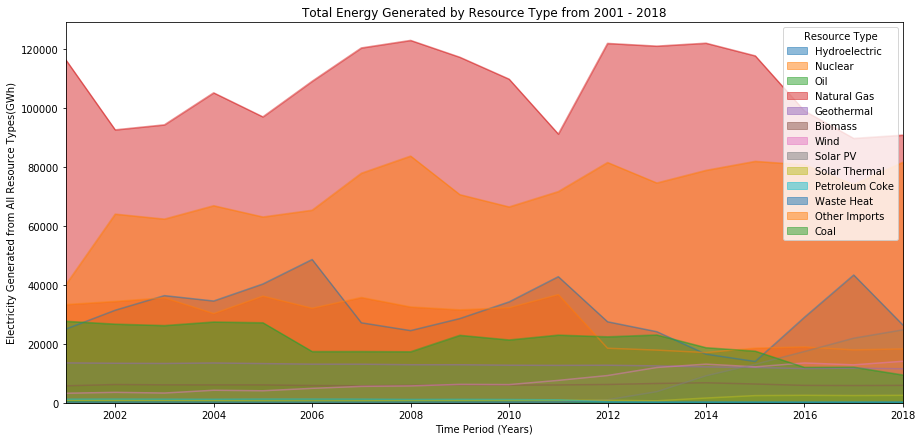

In [52]:
electricity_gen_by_type_plot =electricity_gen_by_type.plot(kind='area', legend='best', figsize=(15,7), stacked=False, title='Total Energy Generated by Resource Type from 2001 - 2018')

electricity_gen_by_type_plot.set_ylabel("Electricity Generated from All Resource Types(GWh)")
electricity_gen_by_type_plot.set_xlabel("Time Period (Years)")

In [53]:
clean_energy = ['Hydroelectric', 'Nuclear', 'Geothermal', 'Biomass', 'Wind', 'Solar PV', 'Solar Thermal']

In [54]:
clean_energy_gen = electricity_gen_by_type[clean_energy]

Text(0.5, 0, 'Time Period (Years)')

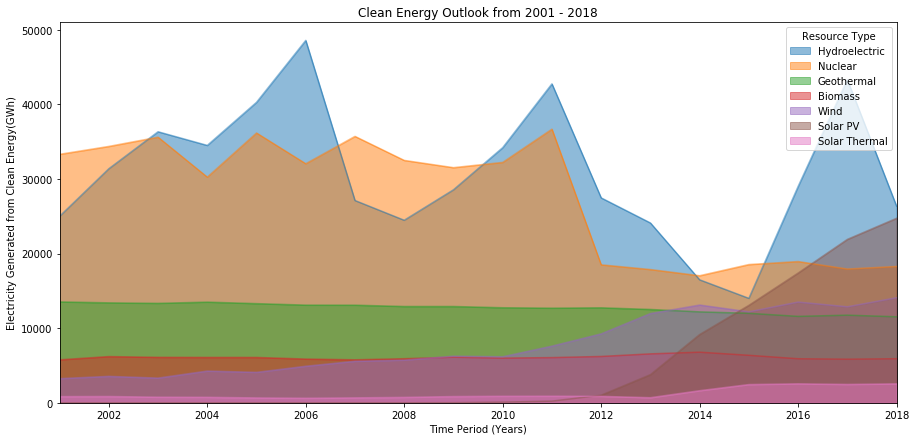

In [55]:
clean_energy_outlook = clean_energy_gen.plot(kind='area', legend='best', figsize=(15,7), stacked=False, title='Clean Energy Outlook from 2001 - 2018')

clean_energy_outlook.set_ylabel("Electricity Generated from Clean Energy(GWh)")
clean_energy_outlook.set_xlabel("Time Period (Years)")

In [56]:
clean_energy_transpose = clean_energy_gen.transpose()

In [57]:
# compare the different clean energy source, used for electricity generation, at different times in years
PiePlot(clean_energy_transpose, 2001, 2010, 2018, "Comparison of Clean Energy Generated at Different Time in Years")

In [58]:
# growth rate over the years
clean_energy_growth = clean_energy_gen.diff()

In [59]:
clean_energy_percent = clean_energy_gen.pct_change() * 100

Text(0.5, 0, 'Time Period (Years)')

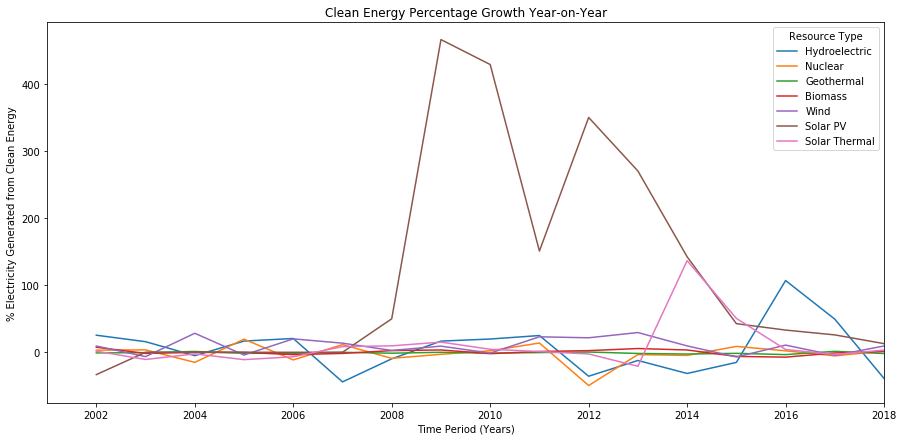

In [60]:
clean_energy_out = clean_energy_percent.plot(kind='line', legend='best', figsize=(15,7), stacked=False, title='Clean Energy Percentage Growth Year-on-Year')

clean_energy_out.set_ylabel("% Electricity Generated from Clean Energy")
clean_energy_out.set_xlabel("Time Period (Years)")

##### 5.1 Observation

Nuclear energy is experiencing a decelaration in its contribution to electricity generation in absolutes and by composition in the clean energy mix (34.9% in 2010 to 17.7% in 2018)

Solar PhotoVoltaic is experiencing a steady growth in its contribution to electricity generation in absolutes and by composition in the clean energy mix (0.00975% in 2010 to 23.9% in 2018)

 ## Key Findings and Conclusion

Overall, the electricity usage pattern from 2001 to 2018 in California shows not only has California recovered from the electricity crisis, there has also been major shifts in the usage dynamics, including moving towards self-generated utility based supply.

There appears to be a high disparity(approximately 14MWh) in the average electricity usage on a per capita level across different counties. However, a more complete data and detailed analysis into the actual electricity usage by county could provide better understanding on how even electricity is used.

For electricity generation trends, while non-clean energy still dominates the electric power industry as the resource type for electricity generation, there has been tremendous improvement in clean energ
y contribution over the years. 

In conclusion, there still exist a market opportunity for new entrants into the California electric power industry as California imports approximately 31% of its resources for electricity generation. I recommended anyone looking to venture into the electric power industry in California to consider avenues that will provide consumers with electricity that is self-generated as opposed to an investor-based utility venture. 

### References

Sweeney, James L. (Summer 2002). "The California Electricity Crisis: Lessons for the Future". National Academy of Engineering of the Nation Academies. 

#### Github Repository

https://github.com/Eserichard/Electricity_Usage_Analysis_in_the_state_of_California